# Project 2 - Imports

In [27]:
#imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import yfinance as yfinance
import datetime 
import scipy.optimize as optimize
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
from nelson_siegel_svensson import NelsonSiegelCurve
import statsmodels.api as sm
from scipy.stats import kurtosis
%matplotlib inline
import seaborn as sns
from scipy.stats.mstats import gmean
import warnings

In [28]:
returns = pd.read_csv('ProjectData.csv')
returns['Date'] = pd.to_datetime(returns['Date'])
returns = returns.set_index('Date')


In [29]:
returns

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Date,,,,,,,,,,,,,,,,,
2012-01-11 00:00:00+00:00,-3.413552e-04,0.119967,0.000000,0.032436,0.013744,0.068514,0.005917,0.008606,-0.000308,0.000000,0.066046,-0.006328,-0.008395,0.017068,0.013658,0.017455,0.014290
2012-01-18 00:00:00+00:00,2.731774e-02,0.023630,0.000000,0.048908,-0.009472,0.031990,0.009519,-0.010395,-0.007467,0.000000,0.013430,-0.015054,-0.003211,0.019694,0.004268,0.042003,0.012232
2012-01-25 00:00:00+00:00,6.232342e-02,0.030809,0.000000,-0.010940,-0.000730,0.030998,0.011319,-0.010565,-0.027729,0.000000,-0.030453,-0.013913,0.000581,-0.007353,0.010851,0.024022,-0.012298
2012-02-01 00:00:00+00:00,-2.080726e-02,0.011589,0.001872,0.027277,-0.008455,0.026424,0.015219,0.003498,0.020847,0.002111,0.008784,0.006244,0.008224,0.015901,0.023434,-0.005031,0.041806
2012-02-08 00:00:00+00:00,3.882409e-02,0.034456,0.000000,0.014844,0.004844,0.018517,0.011017,-0.006727,-0.019669,0.000000,0.048572,0.004574,0.002938,0.022475,0.009696,0.011882,0.055619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-21 00:00:00+00:00,0.000000e+00,-0.005933,0.001823,-0.007686,0.003066,-0.015878,-0.006619,-0.004069,-0.016322,0.001098,0.002942,-0.149369,-0.093576,0.003192,-0.092242,-0.020690,-0.020646
2021-07-28 00:00:00+00:00,6.724823e-08,0.000000,0.002224,0.018729,-0.004430,0.001034,0.001991,-0.006326,0.012492,0.001296,-0.003098,0.154184,0.102261,0.038146,0.150363,0.005162,-0.006029
2021-08-04 00:00:00+00:00,-6.724823e-08,0.034247,0.001311,0.029251,0.004943,0.030400,0.004925,0.002851,-0.018819,0.000498,0.017194,0.009536,0.001865,-0.005349,-0.040421,0.021622,0.004623


# Part 1

## Question 1.1

Explain how these 17 assets were chosen in the Investment Funnel to the TA when you
present your results. In other words explain how the Minimum Spanning Tree method is
used to choose these assets. (Hint: Kourosh has given a lecture on this topic Wednesday
13th of October).

The 17 assets were chosen by using the MST method. 5 iterations of the method were used to get to 17 assets. In every single iteration the MST method creates a tree where we get certain leaf nodes, a node that has a certain amount of degrees. Those nodes are then taken to create a subset of those leaf nodes and the leaf nodes we receive from that iteration are taken and iterated as well. In this case, 5 iterations were done to receive the subset of the leaf nodes of the 133 assets from the Investment Funnel. 

# Part 2

## Question 2.1

In [30]:
a = returns.columns
a

Index(['DK0060079614', 'DK0010264456', 'DK0060158590', 'DK0016272602',
       'DK0016272446', 'DK0010303296', 'DK0016262728', 'DK0060037455',
       'DK0010246479', 'DK0061150984', 'IE00B1XNHC34', 'DE000A0H08R2',
       'DE000A0H08H3', 'IE00B5WHFQ43', 'DE000A0H08S0', 'IE00B0M63391',
       'IE00B2NPL135'],
      dtype='object')

Assuming your 100.000 DKK in any of these 17 assets at the beginning of the period,
draw 17 graphs in the same frame showing the development of your investment during the
entire period.

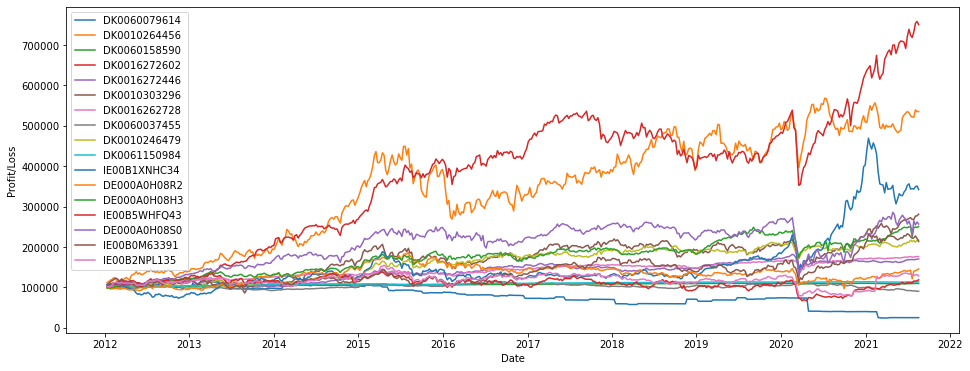

In [31]:
plt.figure(figsize=(16,6))
for i in range(17):
    plt.plot(((returns[a[i]]+1).cumprod())*100000, label = a[i])
    plt.legend(loc="upper left")
    plt.xlabel('Date')
    plt.ylabel('Profit/Loss')

## Question 2.2

What are the average historical returns (in annualized terms), standard deviation of
returns (also in annualized terms) and correlation between returns?

In [32]:
stats = pd.DataFrame(index = returns.columns, columns  =["Ave Hist Returns (Ann)", "Stdev (Ann)", 'Min', 'Max', 
                                                      'Range', 'Kurtosis',
                                                      'Skewness', "AutoCorr", "Sharpe"])

In [33]:
# Function to calculate average returns using geometric mean
def calc_mean(returns):
    return (np.prod(1 + returns))**(1/len(returns)) - 1
weeklymean = calc_mean(returns)
weeklycov = returns.cov()

annual_mean = (1+weeklymean)**52-1

annual_cov = weeklycov*52
print("The annual mean is:\n", annual_mean)
print("\nThe annual cov matrix:\n", annual_cov)

The annual mean is:
 DK0060079614   -0.132703
DK0010264456    0.189850
DK0060158590    0.009853
DK0016272602    0.232191
DK0016272446    0.056862
DK0010303296    0.113197
DK0016262728    0.060617
DK0060037455   -0.009837
DK0010246479    0.083636
DK0061150984    0.013467
IE00B1XNHC34    0.135964
DE000A0H08R2    0.039762
DE000A0H08H3    0.100117
IE00B5WHFQ43    0.018247
DE000A0H08S0    0.102770
IE00B0M63391    0.081942
IE00B2NPL135    0.026561
dtype: float64

The annual cov matrix:
               DK0060079614  DK0010264456  DK0060158590  DK0016272602  \
DK0060079614      0.052675     -0.001394      0.000068     -0.000485   
DK0010264456     -0.001394      0.066803      0.000018      0.023955   
DK0060158590      0.000068      0.000018      0.000065      0.000194   
DK0016272602     -0.000485      0.023955      0.000194      0.034008   
DK0016272446     -0.000045      0.010785      0.000062      0.006356   
DK0010303296     -0.001876      0.021725      0.000240      0.018327   
DK00162627

In [34]:
stats["Ave Hist Returns (Ann)"] = annual_mean
stats["Stdev (Ann)"] = np.sqrt(np.diag(annual_cov))
stats["Min"] = returns.min()
stats["Max"] = returns.max()
stats["Range"] = abs(returns.min()-returns.max())
stats["Kurtosis"] = returns.kurtosis()
stats["Skewness"] = returns.skew()
stats["Sharpe"] = stats["Ave Hist Returns (Ann)"]/stats["Stdev (Ann)"]

In [35]:
for i in range(17):
    x,y = sm.tsa.acf(returns[a[i]],nlags=1)
    stats.iloc[i,7] = y 

In [36]:
stats

,Ave Hist Returns (Ann),Stdev (Ann),Min,Max,Range,Kurtosis,Skewness,AutoCorr,Sharpe
DK0060079614,-0.132703,0.229511,-0.439106,0.192628,0.631734,108.897545,-8.039640,-0.0203578,-0.578198
DK0010264456,0.189850,0.258463,-0.131605,0.120562,0.252168,1.364634,-0.222112,0.030067,0.734535
DK0060158590,0.009853,0.008081,-0.010042,0.005251,0.015294,19.310927,-1.456115,-0.0171298,1.219226
DK0016272602,0.232191,0.184413,-0.165809,0.086457,0.252266,6.274891,-1.125663,0.0791271,1.259079
DK0016272446,0.056862,0.096975,-0.099437,0.049698,0.149135,7.551832,-1.206035,0.0324115,0.586358
DK0010303296,0.113197,0.211282,-0.152854,0.110754,0.263608,2.934544,-0.598089,0.0609819,0.535764
DK0016262728,0.060617,0.080643,-0.142818,0.078777,0.221594,59.332209,-3.570560,-0.0671688,0.751673
DK0060037455,-0.009837,0.058694,-0.024675,0.035991,0.060666,1.433084,0.267451,0.0416942,-0.167601
DK0010246479,0.083636,0.141853,-0.092469,0.068773,0.161242,1.540790,-0.269422,-0.00549378,0.589601
DK0061150984,0.013467,0.010127,-0.016828,0.007900,0.024727,47.723369,-3.584971,-0.148432,1.329838


In [37]:
returns.corr()

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
DK0060079614,1.000000,-0.023496,0.036491,-0.011464,-0.002035,-0.038681,-0.002470,0.045670,-0.038240,0.018203,0.001599,-0.043966,-0.031255,-0.126571,-0.129745,-0.002246,-0.023434
DK0010264456,-0.023496,1.000000,0.008689,0.502588,0.430291,0.397833,0.258153,-0.053772,0.443713,-0.009022,0.493923,0.365941,0.404735,0.369472,0.435003,0.389898,0.264186
DK0060158590,0.036491,0.008689,1.000000,0.130159,0.079073,0.140348,0.199508,0.023099,-0.042793,0.506563,-0.000561,-0.030736,0.048443,0.022971,0.015072,0.016998,-0.013771
DK0016272602,-0.011464,0.502588,0.130159,1.000000,0.355437,0.470374,0.437817,-0.170712,0.423253,0.055917,0.577130,0.437962,0.461761,0.453959,0.571759,0.461994,0.416033
DK0016272446,-0.002035,0.430291,0.079073,0.355437,1.000000,0.474203,0.497497,0.183739,0.536023,0.113075,0.412428,0.316122,0.435189,0.406269,0.377472,0.411289,0.414320
DK0010303296,-0.038681,0.397833,0.140348,0.470374,0.474203,1.000000,0.308170,0.043977,0.478668,0.135118,0.505458,0.390896,0.456143,0.496331,0.461247,0.542081,0.419526
DK0016262728,-0.002470,0.258153,0.199508,0.437817,0.497497,0.308170,1.000000,-0.000647,0.220238,0.121569,0.325830,0.271843,0.313804,0.325518,0.426981,0.377124,0.337967
DK0060037455,0.045670,-0.053772,0.023099,-0.170712,0.183739,0.043977,-0.000647,1.000000,0.061582,0.031539,-0.050886,-0.087705,0.062419,-0.064555,-0.161388,-0.081713,-0.063180
DK0010246479,-0.038240,0.443713,-0.042793,0.423253,0.536023,0.478668,0.220238,0.061582,1.000000,0.029305,0.454839,0.481191,0.578701,0.432097,0.474843,0.451070,0.383306
DK0061150984,0.018203,-0.009022,0.506563,0.055917,0.113075,0.135118,0.121569,0.031539,0.029305,1.000000,-0.043876,-0.068091,-0.020241,0.047302,-0.124902,-0.008177,0.037349


## Question 2.3

What does the distribution of returns look like? What are the range, skewness, kurtosis
and autocorrelation of the returns? What is the Sharpe Ratio of each asset?

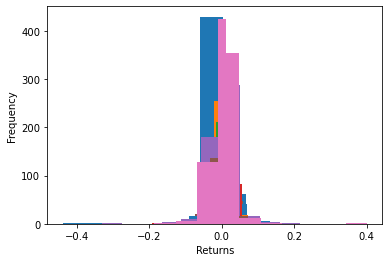

In [38]:
for i in range(17):
    plt.hist(returns[a[i]])       
    plt.xlabel('Returns')
    plt.ylabel('Frequency')

What does skewness tell us?

In a positively skewed distribution, the mean is usually greater than the median because the few high scores tend to shift the mean to the right. In a negatively skewed distribution, the mean is usually less than the median because the few low scores tend to shift the mean to the left.

What does kurtosis tell us?

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

What does autocorrelation tell us?

Autocorrelation refers to the degree of correlation of the same variables between two successive time intervals. It measures how the lagged version of the value of a variable is related to the original version of it in a time series. Autocorrelation, as a statistical concept, is also known as serial correlation.

In [39]:
stats

,Ave Hist Returns (Ann),Stdev (Ann),Min,Max,Range,Kurtosis,Skewness,AutoCorr,Sharpe
DK0060079614,-0.132703,0.229511,-0.439106,0.192628,0.631734,108.897545,-8.039640,-0.0203578,-0.578198
DK0010264456,0.189850,0.258463,-0.131605,0.120562,0.252168,1.364634,-0.222112,0.030067,0.734535
DK0060158590,0.009853,0.008081,-0.010042,0.005251,0.015294,19.310927,-1.456115,-0.0171298,1.219226
DK0016272602,0.232191,0.184413,-0.165809,0.086457,0.252266,6.274891,-1.125663,0.0791271,1.259079
DK0016272446,0.056862,0.096975,-0.099437,0.049698,0.149135,7.551832,-1.206035,0.0324115,0.586358
DK0010303296,0.113197,0.211282,-0.152854,0.110754,0.263608,2.934544,-0.598089,0.0609819,0.535764
DK0016262728,0.060617,0.080643,-0.142818,0.078777,0.221594,59.332209,-3.570560,-0.0671688,0.751673
DK0060037455,-0.009837,0.058694,-0.024675,0.035991,0.060666,1.433084,0.267451,0.0416942,-0.167601
DK0010246479,0.083636,0.141853,-0.092469,0.068773,0.161242,1.540790,-0.269422,-0.00549378,0.589601
DK0061150984,0.013467,0.010127,-0.016828,0.007900,0.024727,47.723369,-3.584971,-0.148432,1.329838


## Distribution plots - individual assets

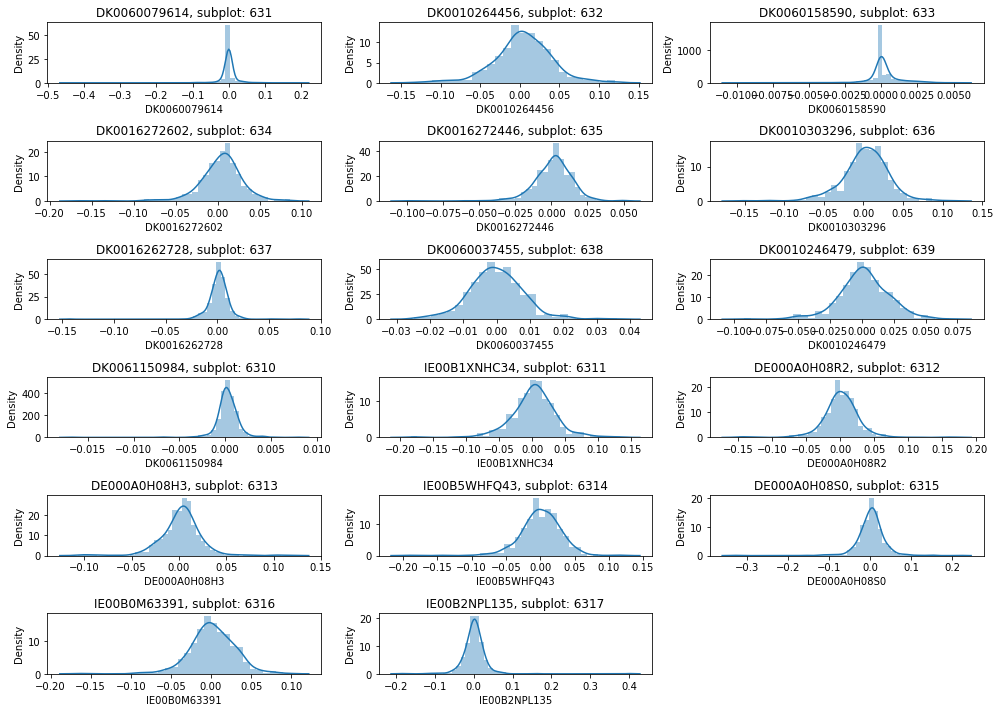

In [40]:
# Distribution

warnings.filterwarnings('ignore')

#  Categorical Data
heart_CAT = ['DK0060079614', 'DK0010264456', 'DK0060158590', 'DK0016272602',
       'DK0016272446', 'DK0010303296', 'DK0016262728', 'DK0060037455',
       'DK0010246479', 'DK0061150984', 'IE00B1XNHC34', 'DE000A0H08R2',
       'DE000A0H08H3', 'IE00B5WHFQ43', 'DE000A0H08S0', 'IE00B0M63391',
       'IE00B2NPL135']

#  Categorical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i in heart_CAT:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(returns[i])
    c = c + 1
    
fig.tight_layout()
plt.show()

# Part 3

Based on the Markowitz portfolio theory, derive and illustrate the optimal portfolio choices.
Identify the following portfolios in terms of weights, return and risk:


## Question 3.1

The maximum expected return portfolio.

The mean of a portfolio can never be higher than the highest of the means of the individual EFTs. In our case, DK0016272602 has the highest annnual return of mean of 0.232191. 
Therefore, the maximum expected return portfolio has 100% weight in DK0016272602.

## Question 3.2

The global minimum variance portfolio.

The global minimum variance portfolio lies to the far left of the efficient frontier and is made up of a portfolio of risky assets that produces the minimum risk for an investor.

In [41]:
from numpy.linalg import inv

In [42]:
mu_1 = np.ones([17,2])
mu_1[:,0] = annual_mean

A = np.transpose(mu_1) @ inv(annual_cov) @ mu_1

c = A[1,1]

# The weights for the global minimum variance portfolio can then be computed
w_gmv = 1/c * inv(annual_cov) @ np.ones([17,1])

print("w_gmv = ", np.transpose(w_gmv))

w_gmv =  [[ 3.68019412e-04  1.55091227e-03  7.04466764e-01 -5.84779753e-03
  -3.09684133e-03 -9.15103062e-03 -1.26102586e-02  1.92738172e-02
   6.18825987e-03  2.88678758e-01  2.54971784e-03  5.86739991e-03
  -9.18563892e-03  1.69656591e-04  5.82145825e-03  2.35396225e-03
   2.60284109e-03]]


In [43]:
w_gmv = [row[0] for row in w_gmv]

In [44]:
mvp_return = np.sum(np.transpose(w_gmv)*np.array(annual_mean))
mvp_risk = np.sqrt(np.dot(np.transpose(w_gmv), np.dot(annual_cov, w_gmv)))

In [45]:
print("MVP return: ", format(mvp_return,".4f"))
print("MVP standard deviation: ", format(mvp_risk,".4f"))

MVP return:  0.0086
MVP standard deviation:  0.0072


In [46]:
mvp = pd.DataFrame(index = returns.columns, columns = ["Weights"])

In [47]:
mvp['Weights'] = w_gmv

In [48]:
print("Weights for each asset in the  GMVP")
print('*'*50)
print(mvp)
print('*'*50)
print("GMVP return: ", format(mvp_return*100, ".4f"))
print("GMVP risk: ", format(mvp_risk, ".4f"))

Weights for each asset in the  GMVP
**************************************************
               Weights
DK0060079614  0.000368
DK0010264456  0.001551
DK0060158590  0.704467
DK0016272602 -0.005848
DK0016272446 -0.003097
DK0010303296 -0.009151
DK0016262728 -0.012610
DK0060037455  0.019274
DK0010246479  0.006188
DK0061150984  0.288679
IE00B1XNHC34  0.002550
DE000A0H08R2  0.005867
DE000A0H08H3 -0.009186
IE00B5WHFQ43  0.000170
DE000A0H08S0  0.005821
IE00B0M63391  0.002354
IE00B2NPL135  0.002603
**************************************************
GMVP return:  0.8592
GMVP risk:  0.0072


## Question 3.3

Draw the efficient frontier using 8 different expected returns in between the returns you
found in questions 3.1 and 3.2. There should be equal distance between each pair of returns
in the efficient frontier. Find the portfolio weights for each of the 8 optimal portfolios as well.

In [49]:
# Function to calculate the minimum variance given a mean
def minVarPort(mu, Sigma, mu_p):
    n = len(mu)
    mu_1 = np.ones([n,2])
    mu_1[:,0] = mu
    A = np.transpose(mu_1) @ inv(Sigma) @ mu_1
    Ainv = inv(A)
    
    opt_weights = inv(Sigma)@ mu_1 @ Ainv @ np.array([[mu_p], [1]])
    opt_var = np.array([[mu_p, 1]]) @ Ainv @ np.array([[mu_p],[1]])

    return {"w1": opt_weights[0,0], 
            "w2": opt_weights[1,0], 
            "w3": opt_weights[2,0] ,
            "w4": opt_weights[3,0] ,
            "w5": opt_weights[4,0] ,
            "w6": opt_weights[5,0] ,
            "w7": opt_weights[6,0] ,
            "w8": opt_weights[7,0] ,
            "w9": opt_weights[8,0] ,
            "w10": opt_weights[9,0] ,
            "w11": opt_weights[10,0] ,
            "w12": opt_weights[11,0] ,
            "w13": opt_weights[12,0] ,
            "w14": opt_weights[13,0] ,
            "w15": opt_weights[14,0] ,
            "w16": opt_weights[15,0] ,
            "w17": opt_weights[16,0] ,
            "variance": opt_var[0,0], "mu": mu_p}


In [50]:
def calcEF(mu, Sigma):

    # Calculate the EF
    df_list = []
    
    
    mvp_return
    max_return = 0.232191
    k = (max_return-mvp_return)/8
    mu_ps = np.linspace(mvp_return+k, max_return, num=8, endpoint=False)
    
    for mu_p in mu_ps:
        opt_port = minVarPort(mu, Sigma, mu_p)
        df_list.append(opt_port)
    df = pd.DataFrame(df_list).round(4)
    df['std'] = np.sqrt(df['variance'])
    return df

In [51]:
mvp_return

0.008591694068952481

In [53]:
EF = calcEF(annual_mean,annual_cov)
EF

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,variance,mu,std
0,-0.0275,0.0070,0.2862,0.0604,0.0081,-0.0047,0.0266,-0.0351,0.0121,0.6961,0.0062,-0.0261,0.0485,-0.0313,-0.0176,0.0070,-0.0158,0.0003,0.0365,0.017321
1,-0.0519,0.0118,-0.0798,0.1184,0.0179,-0.0009,0.0608,-0.0828,0.0173,1.0525,0.0094,-0.0540,0.0989,-0.0589,-0.0381,0.0111,-0.0319,0.0009,0.0610,0.030000
2,-0.0763,0.0166,-0.4458,0.1764,0.0277,0.0030,0.0951,-0.1304,0.0225,1.4090,0.0126,-0.0820,0.1494,-0.0865,-0.0585,0.0152,-0.0480,0.0018,0.0855,0.042426
3,-0.1007,0.0214,-0.8118,0.2344,0.0375,0.0069,0.1294,-0.1780,0.0277,1.7654,0.0159,-0.1100,0.1998,-0.1140,-0.0790,0.0192,-0.0641,0.0031,0.1099,0.055678
4,-0.1251,0.0261,-1.1778,0.2924,0.0473,0.0108,0.1637,-0.2256,0.0329,2.1219,0.0191,-0.1379,0.2503,-0.1416,-0.0995,0.0233,-0.0802,0.0048,0.1344,0.069282
5,-0.1495,0.0309,-1.5438,0.3504,0.0571,0.0146,0.1979,-0.2732,0.0381,2.4784,0.0223,-0.1659,0.3007,-0.1692,-0.1200,0.0274,-0.0963,0.0068,0.1588,0.082462
6,-0.1739,0.0357,-1.9098,0.4084,0.0669,0.0185,0.2322,-0.3208,0.0432,2.8348,0.0255,-0.1939,0.3511,-0.1968,-0.1404,0.0315,-0.1124,0.0091,0.1833,0.095394
7,-0.1982,0.0405,-2.2758,0.4664,0.0767,0.0224,0.2665,-0.3685,0.0484,3.1913,0.0287,-0.2218,0.4016,-0.2243,-0.1609,0.0355,-0.1285,0.0118,0.2077,0.108628


<function matplotlib.pyplot.show(close=None, block=None)>

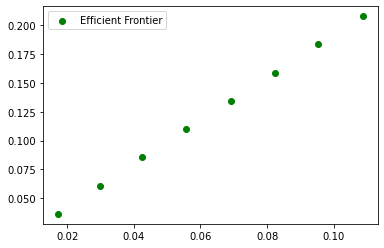

In [54]:
plt.scatter(EF['std'], EF['mu'], color = 'green', label = "Efficient Frontier")
plt.legend()
plt.show

## Question 3.4

What is the equal weight portfolio? Use the return of this portfolio as the target return in
the following question. Draw the risk and return of the equal weight portfolio in the same
graph together with the efficient frontier.

In [543]:
w_eq = np.empty(17)
for i in range(17):
    w_eq[i] = 1/17
    
eqwp_return = np.sum(np.transpose(w_eq)*np.array(annual_mean))
eqwp_risk = np.sqrt(np.dot(np.transpose(w_eq), np.dot(annual_cov, w_eq)))

<function matplotlib.pyplot.show(close=None, block=None)>

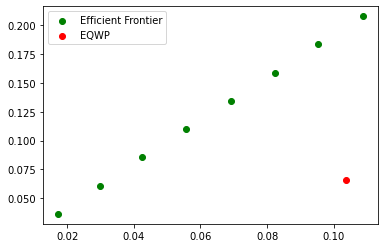

In [547]:
plt.scatter(EF['std'], EF['mu'], color = 'green', label = "Efficient Frontier")
plt.scatter(eqwp_risk, eqwp_return, color= 'red', label = "EQWP")
plt.legend()
plt.show

## Question 3.5

Now find the exact optimal portfolio that has the same return as the return in the equal
weight portfolio. Add this point on the efficient frontier and calculate the difference of
expected return between this portfolio and the queal weight portfolio.

In [566]:
test = minVarPort(annual_mean,annual_cov, eqwp_return)
test

{'w1': -0.05691757094974563,
 'w2': 0.01278369683221451,
 'w3': -0.15512671240365639,
 'w4': 0.13036642302682003,
 'w5': 0.019932722514510323,
 'w6': -6.258341805084021e-05,
 'w7': 0.06789150176732742,
 'w8': -0.09255940588498307,
 'w9': 0.018372450552010186,
 'w10': 1.125857900480166,
 'w11': 0.010091339556840377,
 'w12': -0.059802117393809015,
 'w13': 0.10929099660289127,
 'w14': -0.06458140004866757,
 'w15': -0.042267353788879705,
 'w16': 0.011928244610913059,
 'w17': -0.0351981320559013,
 'variance': 0.0010325885361014836,
 'mu': 0.06602925986701469}

<function matplotlib.pyplot.show(close=None, block=None)>

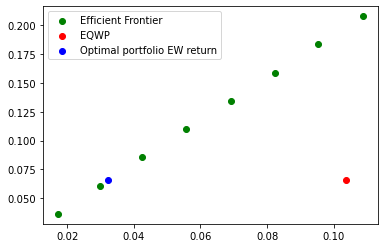

In [565]:
plt.scatter(EF['std'], EF['mu'], color = 'green', label = "Efficient Frontier")
plt.scatter(eqwp_risk, eqwp_return, color= 'red', label = "EQWP")
plt.scatter(np.sqrt(test['variance']), test['mu'], color = 'blue', label = "Optimal portfolio EW return")
plt.legend()
plt.show



In [568]:
print("Difference of standard deviation of EQWP and optimal:", eqwp_risk - np.sqrt(test['variance']))

Difference of standard deviation of EQWP and optimal: 0.07155272841117566


## Question 3.6

Find the tangent portfolio, and draw the capital market line from the risk free point to the
efficient frontier.

In [648]:
def compute_cpm(Sigma, mu, mu_p, mu_0):
    mu = np.expand_dims(mu, 1)
    mu_e = mu - mu_0
    mu_p_e = mu_p - mu_0
    weights = inv(Sigma) @ mu_e @ (mu_p_e / (mu_e.T @ inv(Sigma) @ mu_e))
    portfolio_std = mu_p_e / np.sqrt(mu_e.T @ inv(Sigma) @ mu_e)
    return weights, portfolio_std, mu_p

In [655]:
#cpm_mu = np.arange(start=0.00, stop=0.05, step=0.01)
cpm_mu = np.array([0.0,EF['mu'][0]])

cpm_returns = np.array([])
cpm_stds = np.array([])
for portfolio_mu in cpm_mu:
    _, standard_dev, mu = compute_cpm(annual_cov, annual_mean, portfolio_mu, 0.0)
    cpm_returns = np.append(cpm_returns, mu)
    cpm_stds = np.append(cpm_stds, standard_dev)

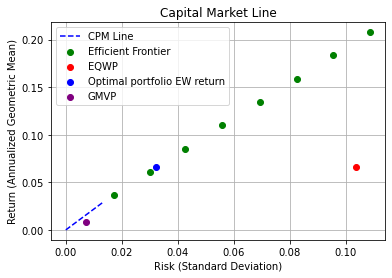

In [650]:
plt.scatter(EF['std'], EF['mu'], color = 'green', label = "Efficient Frontier")
plt.scatter(eqwp_risk, eqwp_return, color= 'red', label = "EQWP")
plt.scatter(np.sqrt(test['variance']), test['mu'], color = 'blue', label = "Optimal portfolio EW return")
plt.plot(cpm_stds, cpm_returns, label='CPM Line', color='b', linestyle='--')

plt.scatter(mvp_risk, mvp_return, color = 'purple', label = 'GMVP')
#plt.scatter(annual_mean.max(), 0.184413, color = 'orange', label = 'Highest return')

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return (Annualized Geometric Mean)')
plt.title('Capital Market Line')

plt.legend()
plt.grid()
plt.show()

In [698]:
mu_tan = (np.transpose(stats['Ave Hist Returns (Ann)']) @ inv(annual_cov) @ stats['Ave Hist Returns (Ann)']) / (np.transpose(np.ones(17)) @ inv(annual_cov) @ stats['Ave Hist Returns (Ann)'])
std_tan = (np.sqrt(np.transpose(stats['Ave Hist Returns (Ann)']) @ inv(annual_cov) @ stats['Ave Hist Returns (Ann)'])) / (np.transpose(np.ones(17)) @ inv(annual_cov) @ stats['Ave Hist Returns (Ann)'])

w_tan = (inv(annual_cov)@stats['Ave Hist Returns (Ann)'])/(np.transpose(np.ones(17)) @ inv(annual_cov) @ stats['Ave Hist Returns (Ann)'])


Tangent portfolio:
****************************************
Return:  0.028986412097259263
Standard Deviation:  0.013255195232824663
Weights:  [-0.01997274  0.00553941  0.3992455   0.04251864  0.00508041 -0.00592394
  0.01597401 -0.02043551  0.01051458  0.58594123  0.00522757 -0.01745029
  0.03288261 -0.02282191 -0.01125374  0.00575356 -0.01081939]


In [701]:
print("Tangent portfolio:")
print('*'*50)
print("Return: ", mu_tan)
print("Standard Deviation: ", std_tan)
print('*'*50)
print("Weights: ", w_tan)

Tangent portfolio:
**************************************************
Return:  0.028986412097259263
Standard Deviation:  0.013255195232824663
**************************************************
Weights:  [-0.01997274  0.00553941  0.3992455   0.04251864  0.00508041 -0.00592394
  0.01597401 -0.02043551  0.01051458  0.58594123  0.00522757 -0.01745029
  0.03288261 -0.02282191 -0.01125374  0.00575356 -0.01081939]


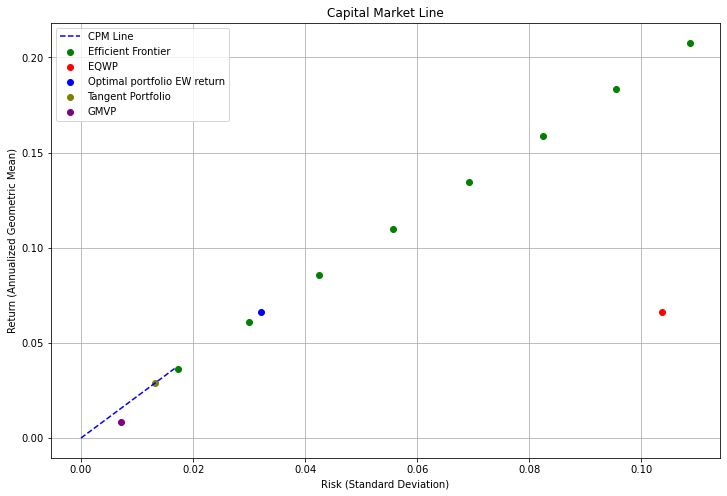

In [659]:
plt.figure(figsize=(12,8))

plt.scatter(EF['std'], EF['mu'], color = 'green', label = "Efficient Frontier")
plt.scatter(eqwp_risk, eqwp_return, color= 'red', label = "EQWP")
plt.scatter(np.sqrt(test['variance']), test['mu'], color = 'blue', label = "Optimal portfolio EW return")
plt.plot(cpm_stds, cpm_returns, label='CPM Line', color='b', linestyle='--')
plt.scatter(std_tan, mu_tan, color = 'olive', label = 'Tangent Portfolio')

plt.scatter(mvp_risk, mvp_return, color = 'purple', label = 'GMVP')
#plt.scatter(annual_mean.max(), 0.184413, color = 'orange', label = 'Highest return')

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return (Annualized Geometric Mean)')
plt.title('Capital Market Line')

plt.legend()
plt.grid()
plt.show()